<a href="https://colab.research.google.com/github/zzhining/ml_basic/blob/main/agglomerative_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/zzhining/ml_basic/main/dataset/cluster_example_data.csv', index_col= 'id')
# data = data.values

In [2]:
df.head()

,size,age
id,,
0,34,5
1,25,5
2,30,2
3,38,20
4,44,12


<Axes: xlabel='size', ylabel='age'>

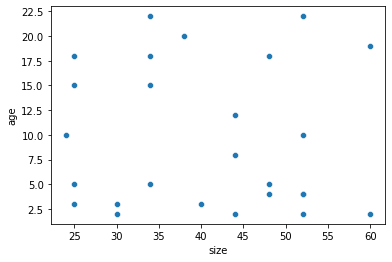

In [3]:
sns.scatterplot(x = 'size', y = 'age', data = df)

In [4]:
X = df.values

# 계층적 군집분석

## 최단거리기반

In [5]:
# Aggromerative 라는 계층적 군집 방식 이용 ( bottom-up 방식 )
# 반대로 Top-down 방식은 Divisive 라고 함 
from sklearn.cluster import AgglomerativeClustering

# single : 각 클러스터 구성하는 데이터 포인트 중 가장 가까운 데이터 포인트 간 거리 기준 
cluster_idf = AgglomerativeClustering(linkage='single', metric='cosine', n_clusters=4).fit(X)
cluster_idf.labels_

array([2, 2, 2, 3, 0, 0, 0, 0, 3, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2])

In [6]:
df['cluster'] = cluster_idf.labels_

<Axes: xlabel='size', ylabel='age'>

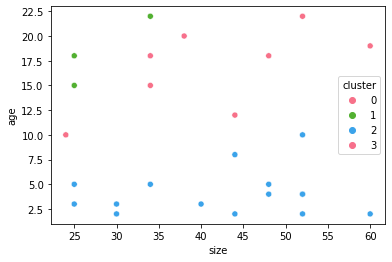

In [11]:
sns.scatterplot(x = 'size', y = 'age', hue = 'cluster', data = df, palette="husl")

## Ward 기반

In [8]:
# ward: 계층적 군집에서 두 개의 클러스터가 합쳐질 떄, 데이터 포인트들이 갖는 분산이 가장 작은 클러스터끼리 묶는 방식 
cluster_idf1 = AgglomerativeClustering(linkage='ward', n_clusters=4).fit(X)

<Axes: xlabel='size', ylabel='age'>

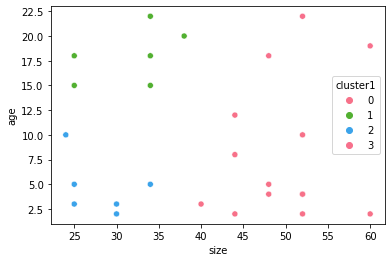

In [12]:
df['cluster1'] = cluster_idf1.labels_
sns.scatterplot(x = 'size', y = 'age', hue = 'cluster1', data = df, palette="husl")

## 덴드로그램

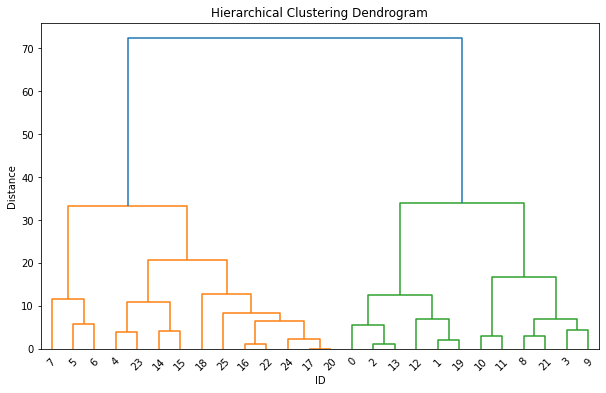

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward')
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('ID')
plt.ylabel('Distance')
dendrogram(Z)
plt.show()